# Datenvorbereitung  

## Vorgehen:

#### 1. Datenvorbereitung  
    1.1 Daten und Bibliotheken laden  
    1.2 Aufteilung in Trainings- und Testdaten  
    1.3 Skalierung der Eingabewerte (Feature Transformation #3)

#### 2. Modellerstellung  
    2.1 Netzstruktur nach Feed Forward definieren
    2.2 Neuronales Netz trainieren
      
#### 3. Modellvalidierung   
    3.1 Accuracy   
    3.2 Confusion Matrix  
    3.3 Recall, Precision & F1 Score  
 


## 1. Datenvorbereitung

### 1.1 Daten und Bibliotheken laden

In [27]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

dateipfad = "C:\\Users\\AMeinert\\Documents\\Python_Scripts\\projects\\OracleCloud\\data\\"


datei_gesamtes_features_set = "gesamtes_feature_set"
datei_reduziertes_features_set = "reduziertes_feature_set"


#data_gesamt = pd.read_pickle(dateipfad + datei_gesamtes_features_set)

data_reduziert = pd.read_pickle(dateipfad + datei_reduziertes_features_set)


In [28]:
data_reduziert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49366 entries, 0 to 49726
Data columns (total 35 columns):
NIEDERSCHLAG_MENGE          49366 non-null float64
DAMPFDRUCK_MITTEL           49366 non-null float64
TEMP_MITTEL                 49366 non-null float64
LUFTFEUCHTE_MITTEL          49366 non-null float64
TEMP_MAX_2M                 49366 non-null float64
TEMP_MIN_2M                 49366 non-null float64
TEMP_MIN_BODEN              49366 non-null float64
GRENZWERTUEBERSCHREITUNG    49366 non-null category
NIEDERSCHLAG_MENGE_TMP      49366 non-null float64
dummy_Hintergrund           49366 non-null uint8
dummy_Industrie             49366 non-null uint8
dummy_Verkehr               49366 non-null uint8
dummy_ohne Zuordnung        49366 non-null uint8
dummy_Frühling              49366 non-null uint8
dummy_Herbst                49366 non-null uint8
dummy_Sommer                49366 non-null uint8
dummy_Winter                49366 non-null uint8
dummy_2012                  49366 non-n

### 1.2 Aufteilung in Trainings- und Testdaten

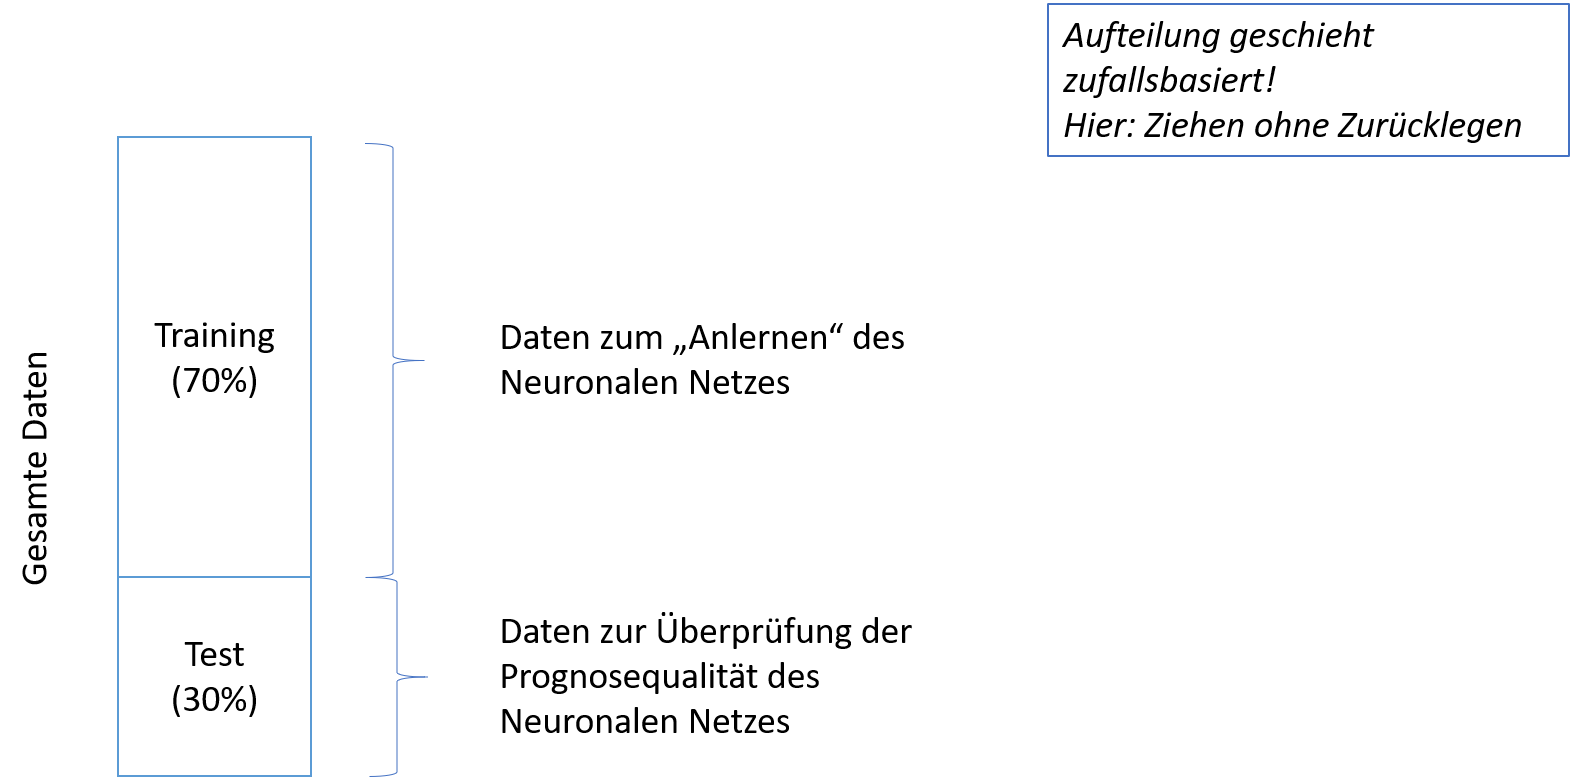

In [29]:
from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data_gesamt, test_size=0.3, random_state=1234)
train_set, test_set = train_test_split(data_reduziert, test_size=0.3, random_state=1234)


print("Daten im Trainingsset : " + str(len(train_set)))
print("Daten im Testset : " + str(len(test_set)))


Daten im Trainingsset : 34556
Daten im Testset : 14810


### 1.3 Skalierung der Eingabewerte (Feature Transformation #3)

Gängige Skalierungsverfahren
<ul>
    <li>Normalisierung (sog. MinMaxScaler): Skalierung der Merkmale auf einem Intervall zwischen 0 (minimale Wert von Merkmal X) und 1 (maximaler Wert von Merkmal X). Vorteil: Neuronales Netz kann mit diesen Werten schneller zu einem Optimium finden + Merkmale sind vergleichbarer, da alle ein Intervall von 0 bis 1 besitzen (günstig bei Plots). Nachteil: Empfindlich gegen Ausreißer.</li>
    <li>Standardisierung: Werte werden um den Mittelwert zentriert sowie durch die Standardabweichung geteilt. Vorteil: Robust gegen Ausreißer. Nachteil: Kein festes Intervall. Werte werden auf negativen und positiven Bereich (symmetrisch) um 0 transformiert</li>
    <li>Weitere Skalierer: Logarithmus. Eigenschaft: Verändert die Verteilung der Merkmale, da hier nicht die relativen Abstände der Datenpunkte verändert werden (siehe Normalisierung/Standardisierung), sondern auch absolute. Anwendungsbereiche: Bei Daten mit extremen Ausreißern.
</ul>
        


In [30]:
x_train = train_set.drop(columns = ["GRENZWERTUEBERSCHREITUNG"])
y_train = train_set["GRENZWERTUEBERSCHREITUNG"]

x_test = test_set.drop(columns = ["GRENZWERTUEBERSCHREITUNG"])
y_test = test_set["GRENZWERTUEBERSCHREITUNG"]

In [31]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

#scaler = MinMaxScaler() # 0 und 1 skalieren
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [32]:
pd.DataFrame(x_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
count,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,...,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000,34556.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,...,0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-0.5023,-2.2740,-3.3336,-4.1456,-2.9901,-3.9238,-4.5279,-0.5023,-0.5214,-1.1252,...,-0.2983,-0.2994,-0.3060,-0.2998,-0.3061,-0.3028,-0.2971,-0.3060,-0.2995,-0.3069
25%,-0.5023,-0.7962,-0.7475,-0.6409,-0.7826,-0.7442,-0.7400,-0.5023,-0.5214,-1.1252,...,-0.2983,-0.2994,-0.3060,-0.2998,-0.3061,-0.3028,-0.2971,-0.3060,-0.2995,-0.3069
50%,-0.4785,-0.1449,-0.0086,0.1163,-0.0209,0.0376,0.0409,-0.4785,-0.5214,0.8888,...,-0.2983,-0.2994,-0.3060,-0.2998,-0.3061,-0.3028,-0.2971,-0.3060,-0.2995,-0.3069
75%,0.0454,0.7317,0.7611,0.7521,0.7665,0.7847,0.7553,0.0454,-0.5214,0.8888,...,-0.2983,-0.2994,-0.3060,-0.2998,-0.3061,-0.3028,-0.2971,-0.3060,-0.2995,-0.3069
max,13.7631,3.2616,3.0239,1.9727,3.0386,3.0261,2.7822,13.7631,1.9180,0.8888,...,3.3521,3.3405,3.2678,3.3360,3.2672,3.3021,3.3657,3.2684,3.3386,3.2581


## 2. Modellerstellung       

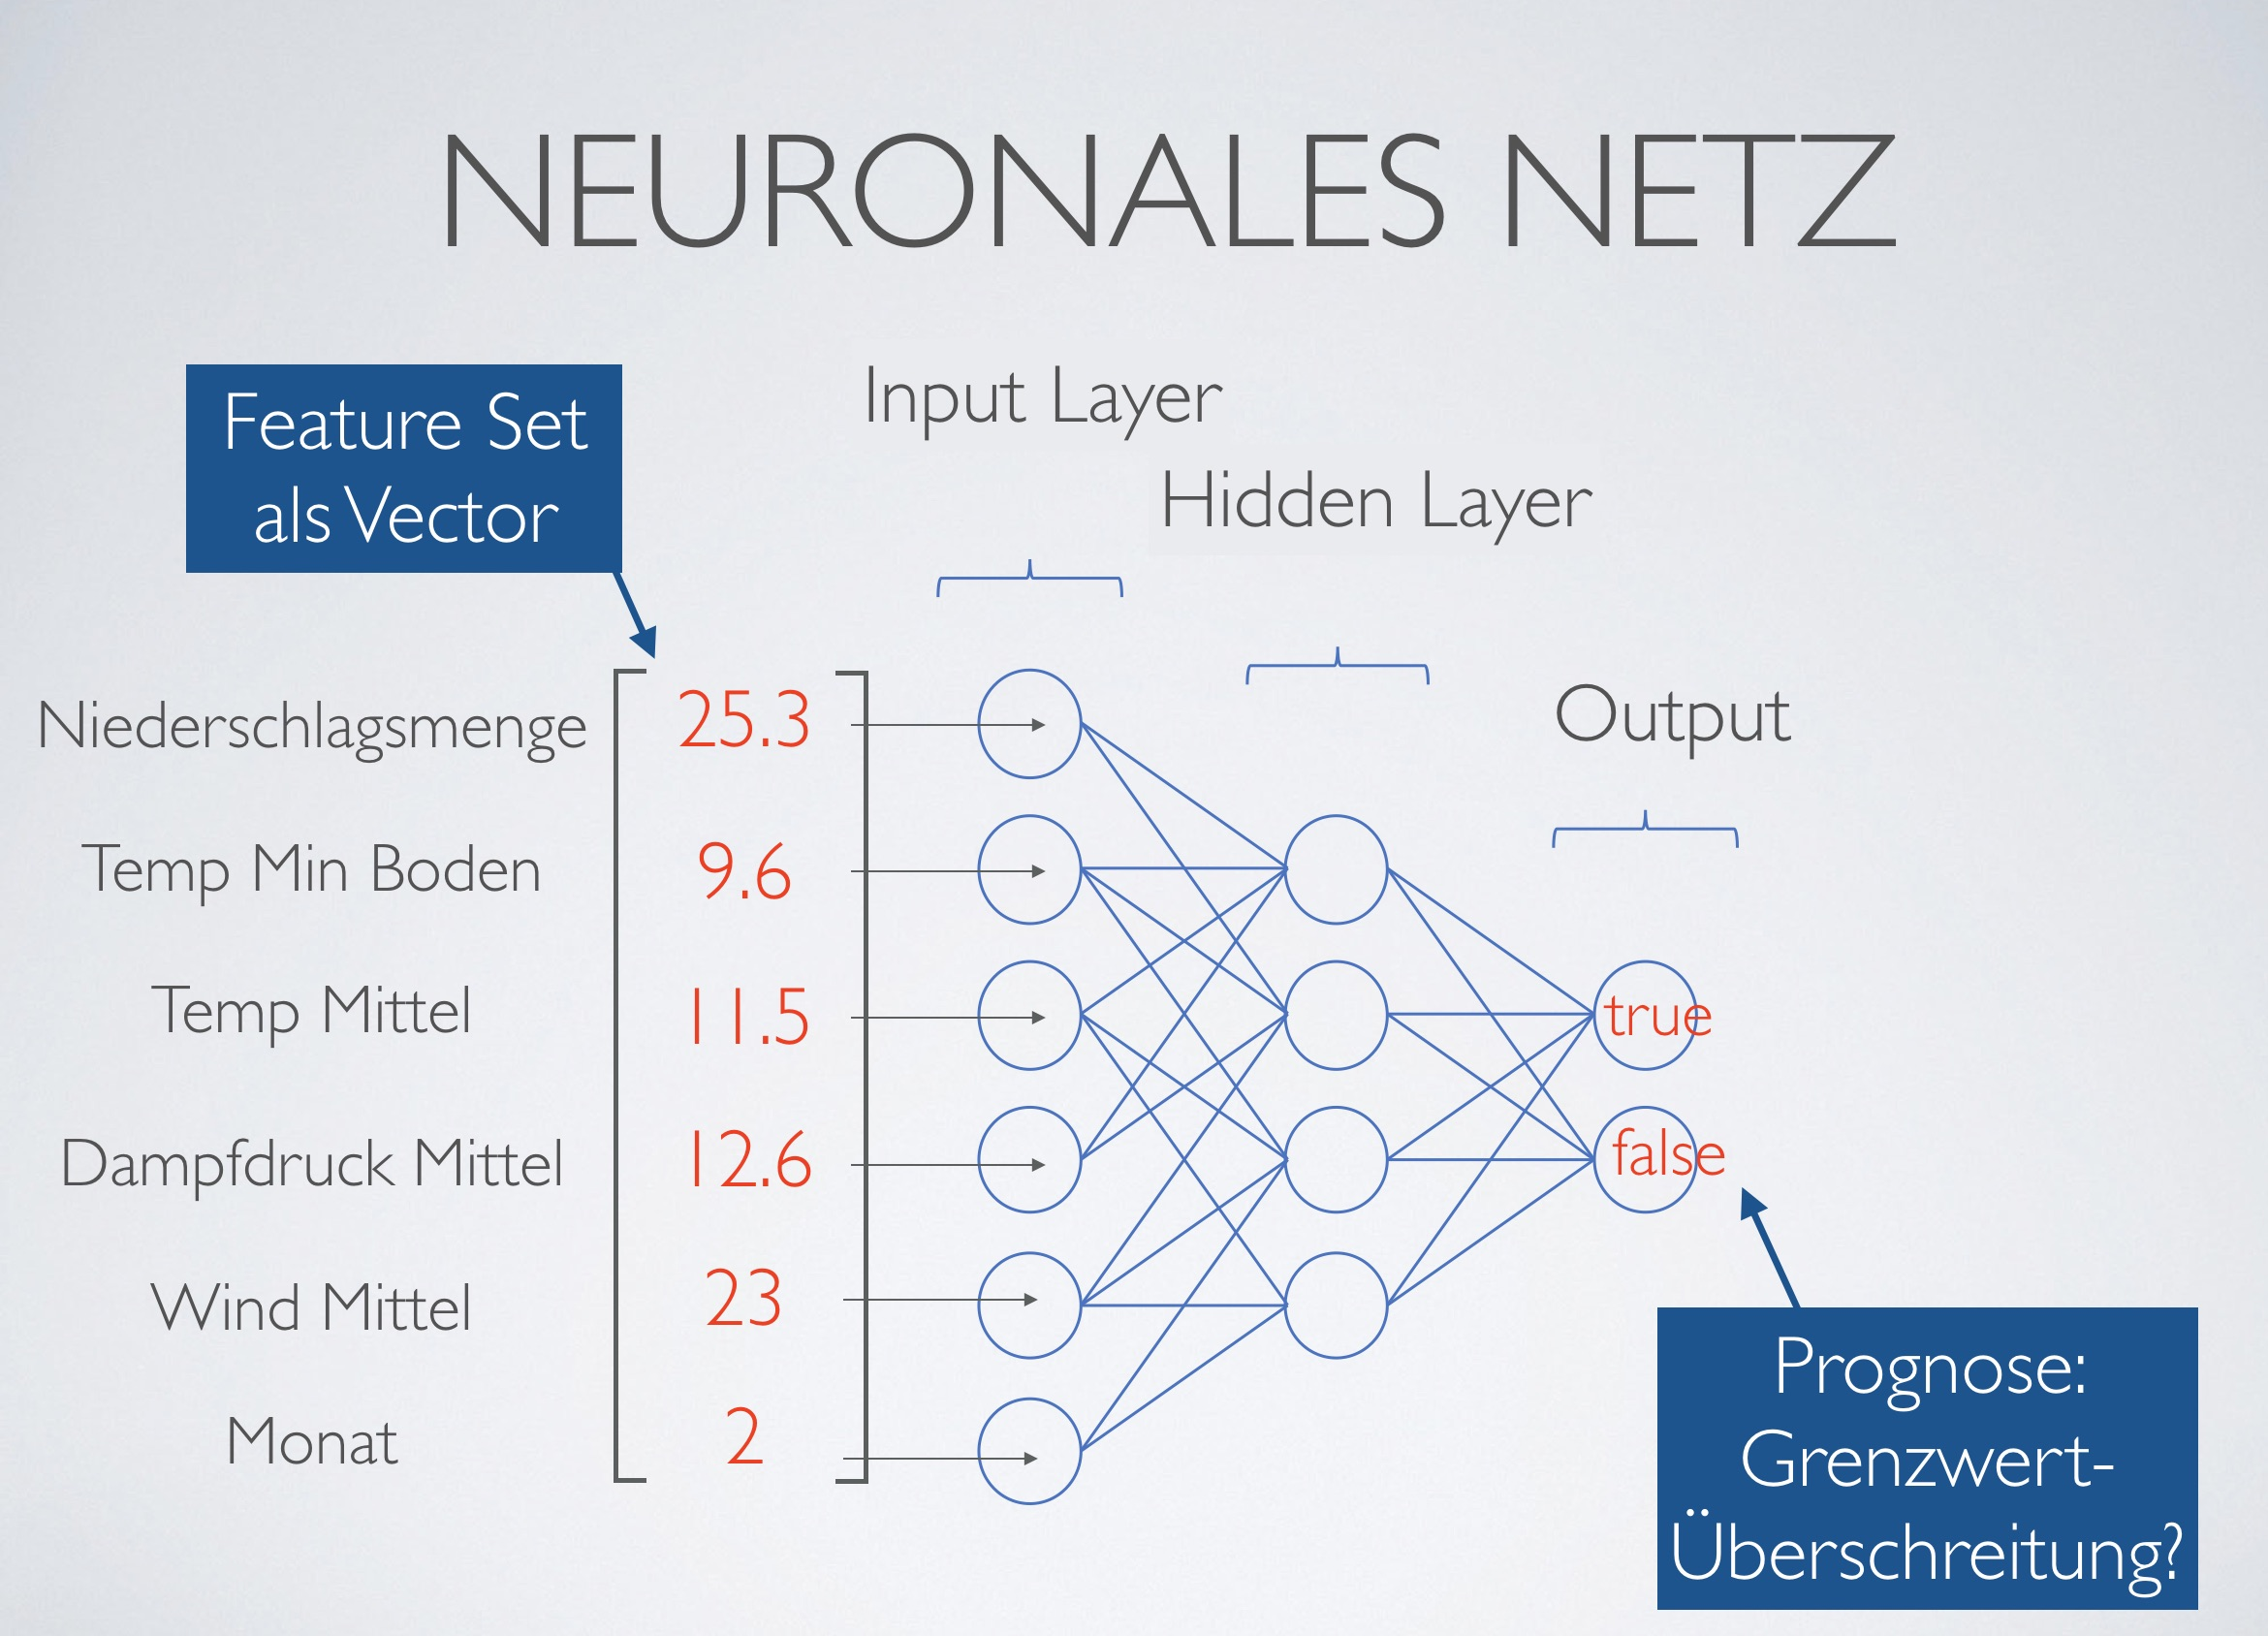

### 2.1 Netzstruktur nach Feed Forward definieren

In [7]:
from keras.models import Sequential
from keras.layers import Dense


## Rohform des Modells
NN = Sequential()

## Eingabeschicht 
NN.add(Dense(len(x_train.columns) +10 ,input_dim=len(x_train.columns), 
             kernel_initializer="random_uniform", activation="relu"))

## Zwischenschichten
NN.add(Dense(15,kernel_initializer="normal", activation="relu"))
NN.add(Dense(6,kernel_initializer="normal", activation="relu")) 


## Ausgabeschicht
NN.add(Dense(1,kernel_initializer="random_uniform", activation="sigmoid"))

## Modell bauen
## 
NN.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"]) 

# https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 2.2 Neuronales Netz trainieren


In [8]:
trainingshistorie = NN.ﬁt(x_train_scaled, y_train, epochs=200, verbose=True)

Epoch 1/200
34556/34556 [==============================] - 2s 56us/step - loss: 0.2576 - acc: 0.9157
Epoch 2/200
34556/34556 [==============================] - 2s 44us/step - loss: 0.2100 - acc: 0.9166
Epoch 3/200
34556/34556 [==============================] - 2s 51us/step - loss: 0.2026 - acc: 0.9231
Epoch 4/200
34556/34556 [==============================] - 2s 54us/step - loss: 0.1973 - acc: 0.9248: 0s - loss: 0.1969 - acc: 0
Epoch 5/200
34556/34556 [==============================] - 1s 42us/step - loss: 0.1929 - acc: 0.9259: 1s -
Epoch 6/200
34556/34556 [==============================] - 2s 46us/step - loss: 0.1898 - acc: 0.9283
Epoch 7/200
34556/34556 [==============================] - 2s 48us/step - loss: 0.1868 - acc: 0.9292
Epoch 8/200
34556/34556 [==============================] - 2s 50us/step - loss: 0.1855 - acc: 0.9299
Epoch 9/200
34556/34556 [==============================] - 2s 48us/step - loss: 0.1832 - acc: 0.9302: 0s - loss: 0.1800 - acc: 0.93 - ETA: 0s - loss: 0.179
Ep

34556/34556 [==============================] - 3s 84us/step - loss: 0.1502 - acc: 0.9427
Epoch 75/200
34556/34556 [==============================] - 3s 81us/step - loss: 0.1501 - acc: 0.9426
Epoch 76/200
34556/34556 [==============================] - 3s 77us/step - loss: 0.1503 - acc: 0.9424
Epoch 77/200
34556/34556 [==============================] - 3s 83us/step - loss: 0.1495 - acc: 0.9424
Epoch 78/200
34556/34556 [==============================] - 3s 81us/step - loss: 0.1487 - acc: 0.9431
Epoch 79/200
34556/34556 [==============================] - 3s 92us/step - loss: 0.1492 - acc: 0.9436: 1s - loss: 0.1487 - acc: 0.942 - ETA: 1s - loss: 0
Epoch 80/200
34556/34556 [==============================] - 1s 40us/step - loss: 0.1494 - acc: 0.9432
Epoch 81/200
34556/34556 [==============================] - 1s 33us/step - loss: 0.1493 - acc: 0.9430
Epoch 82/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1487 - acc: 0.9428
Epoch 83/200
34556/34556 [=================

34556/34556 [==============================] - 1s 27us/step - loss: 0.1348 - acc: 0.9480
Epoch 154/200
34556/34556 [==============================] - 1s 27us/step - loss: 0.1347 - acc: 0.9476
Epoch 155/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1346 - acc: 0.9487
Epoch 156/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1353 - acc: 0.9484
Epoch 157/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1346 - acc: 0.9480
Epoch 158/200
34556/34556 [==============================] - 1s 27us/step - loss: 0.1349 - acc: 0.9476
Epoch 159/200
34556/34556 [==============================] - 1s 27us/step - loss: 0.1340 - acc: 0.9484
Epoch 160/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1338 - acc: 0.9478
Epoch 161/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.1341 - acc: 0.9479
Epoch 162/200
34556/34556 [==============================] - 1s 28us/step - loss: 0.134

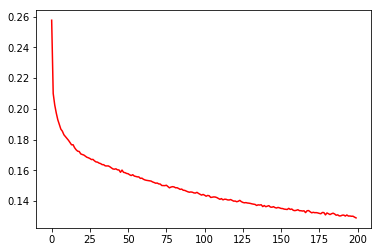

In [33]:
pd.Series(trainingshistorie.history["loss"]).plot(color="red")

<h2>3. Modellvalidierung </h2>

Gängige Metriken bei Klassifizierungsfragestellungen
<ul>
    <li>Accuracy</li>
    <li>Confusion Matrix</li>
</ul>

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_test_vorhersage = np.round(NN.predict(x_test_scaled).reshape(x_test_scaled.shape[0],))

In [35]:
accuracy_score(y_test, y_test_vorhersage)

0.937069547602971

In [36]:
pd.Series(y_test_vorhersage).value_counts()

0.0000    13931
1.0000      879
dtype: int64

In [37]:
y_test.value_counts()

0    13505
1     1305
Name: GRENZWERTUEBERSCHREITUNG, dtype: int64

In [38]:
d = pd.DataFrame(y_test_vorhersage, y_test)
d = d.reset_index()
d.columns = ["prediction", "label"]
d.prediction = d.prediction.astype(int)
d.label = d.label.astype(int)

In [39]:
len(d[(d.label == 1) & (d.prediction == 1)])

626

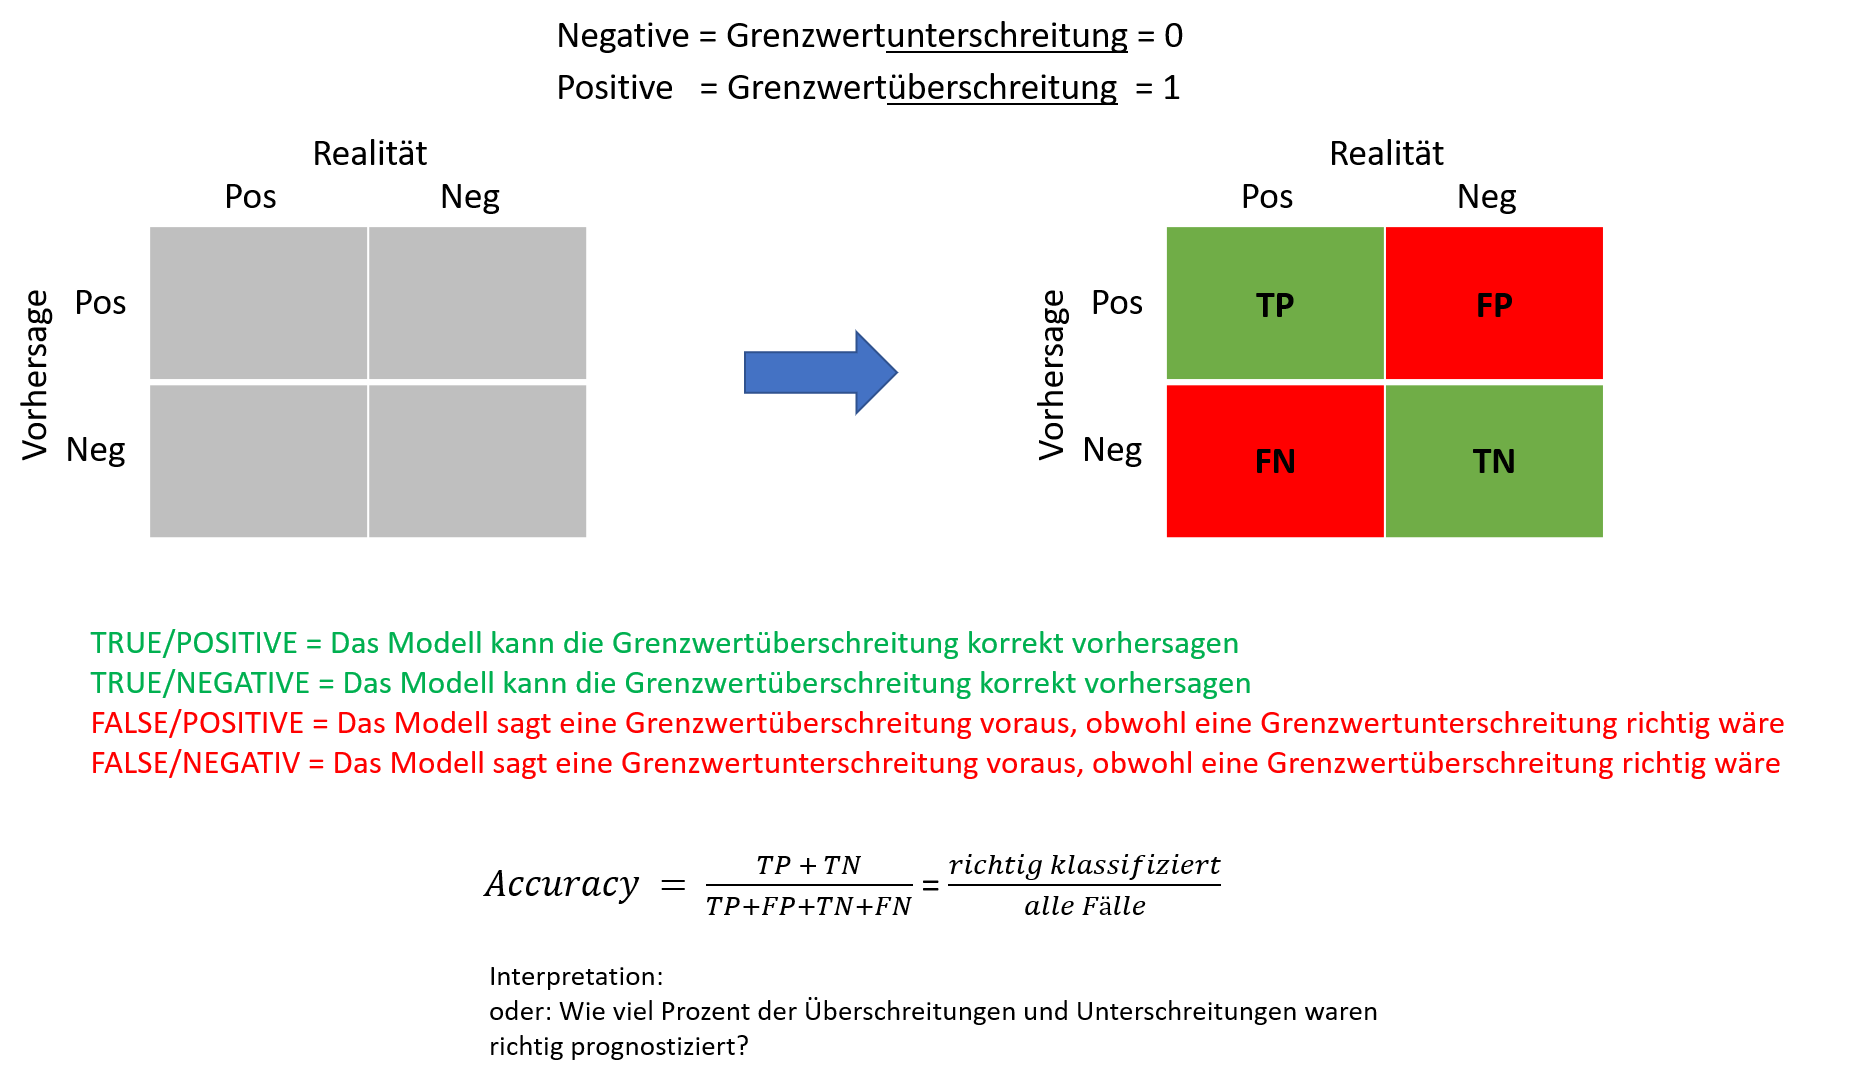

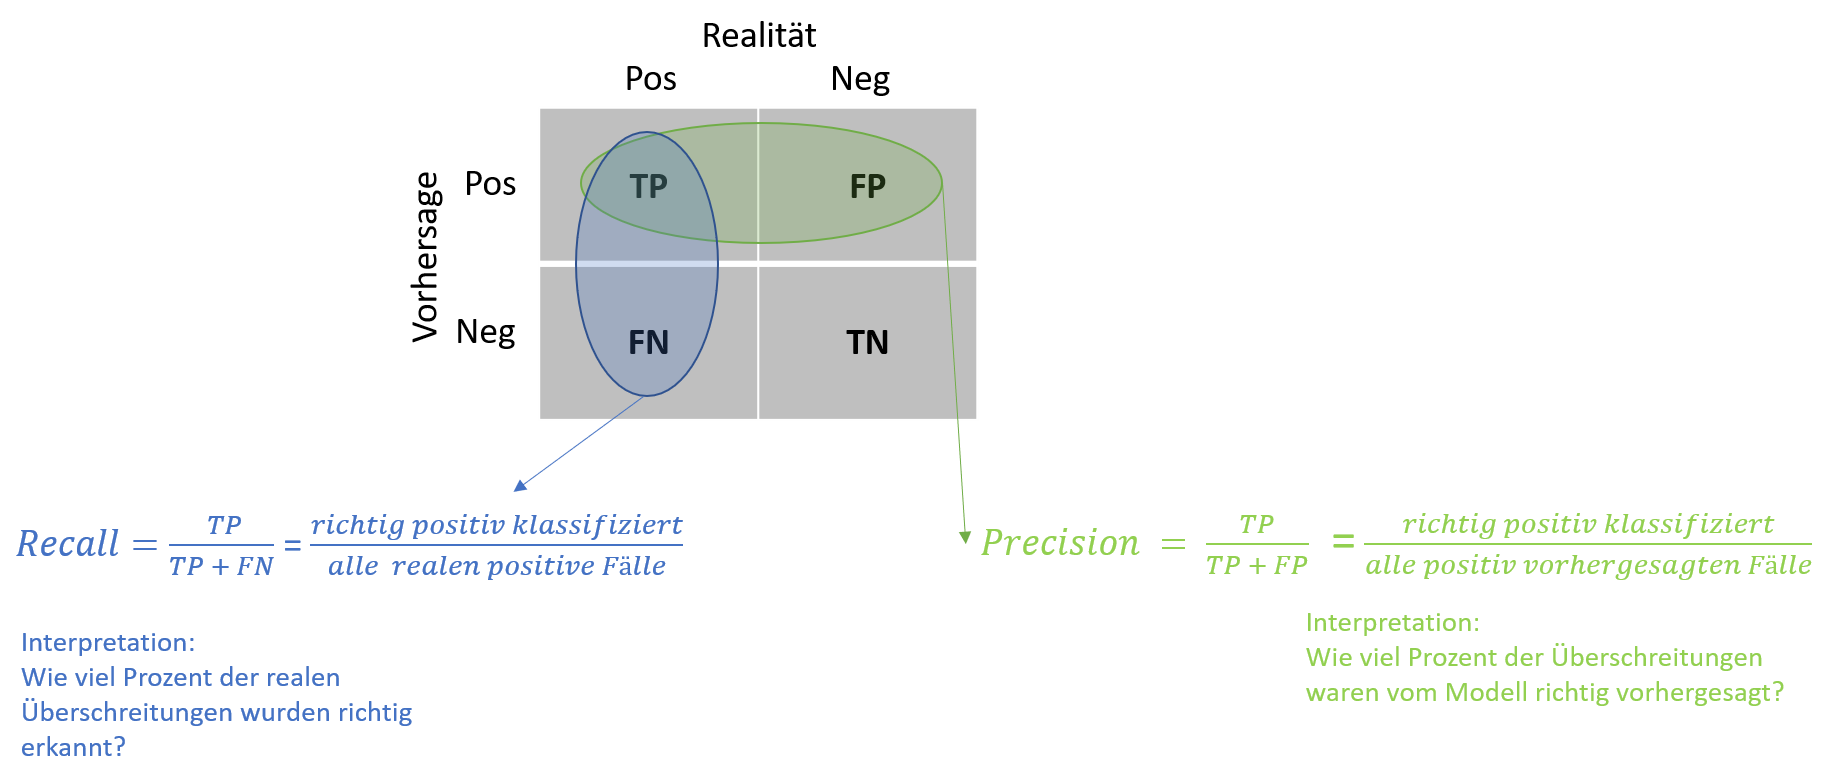

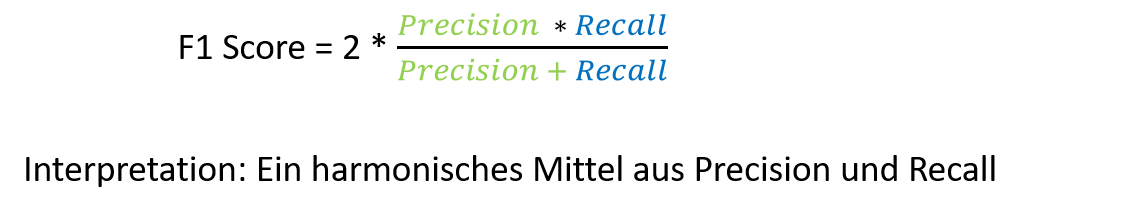

In [40]:
confusion_matrix(y_test, y_test_vorhersage)

array([[13252,   253],
       [  679,   626]], dtype=int64)

In [41]:
tn, fp, fn, tp = confusion_matrix(y_test, y_test_vorhersage).ravel()

print("TP = " + str(tp) + " FP = " + str(fp))
print("FN = " + str(fn) + " TN = " + str(tn))


TP = 626 FP = 253
FN = 679 TN = 13252


In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("recall: " + str(recall_score(y_test, y_test_vorhersage)))
print("precision " + str(precision_score(y_test, y_test_vorhersage)))
print("f1 " + str(f1_score(y_test, y_test_vorhersage)))



recall: 0.4796934865900383
precision 0.7121729237770194
f1 0.5732600732600732


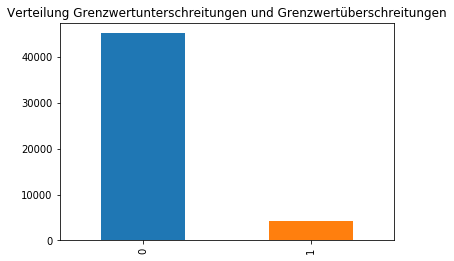

In [43]:
data_reduziert["GRENZWERTUEBERSCHREITUNG"].value_counts().plot(kind = "bar", title="Verteilung Grenzwertunterschreitungen und Grenzwertüberschreitungen")

## Potenzielles Problem 1: Imbalanced Dataset 
### Der Algorithmus hat zu wenig Beispiele um eine Grenzwertüberschreitung zu lernen

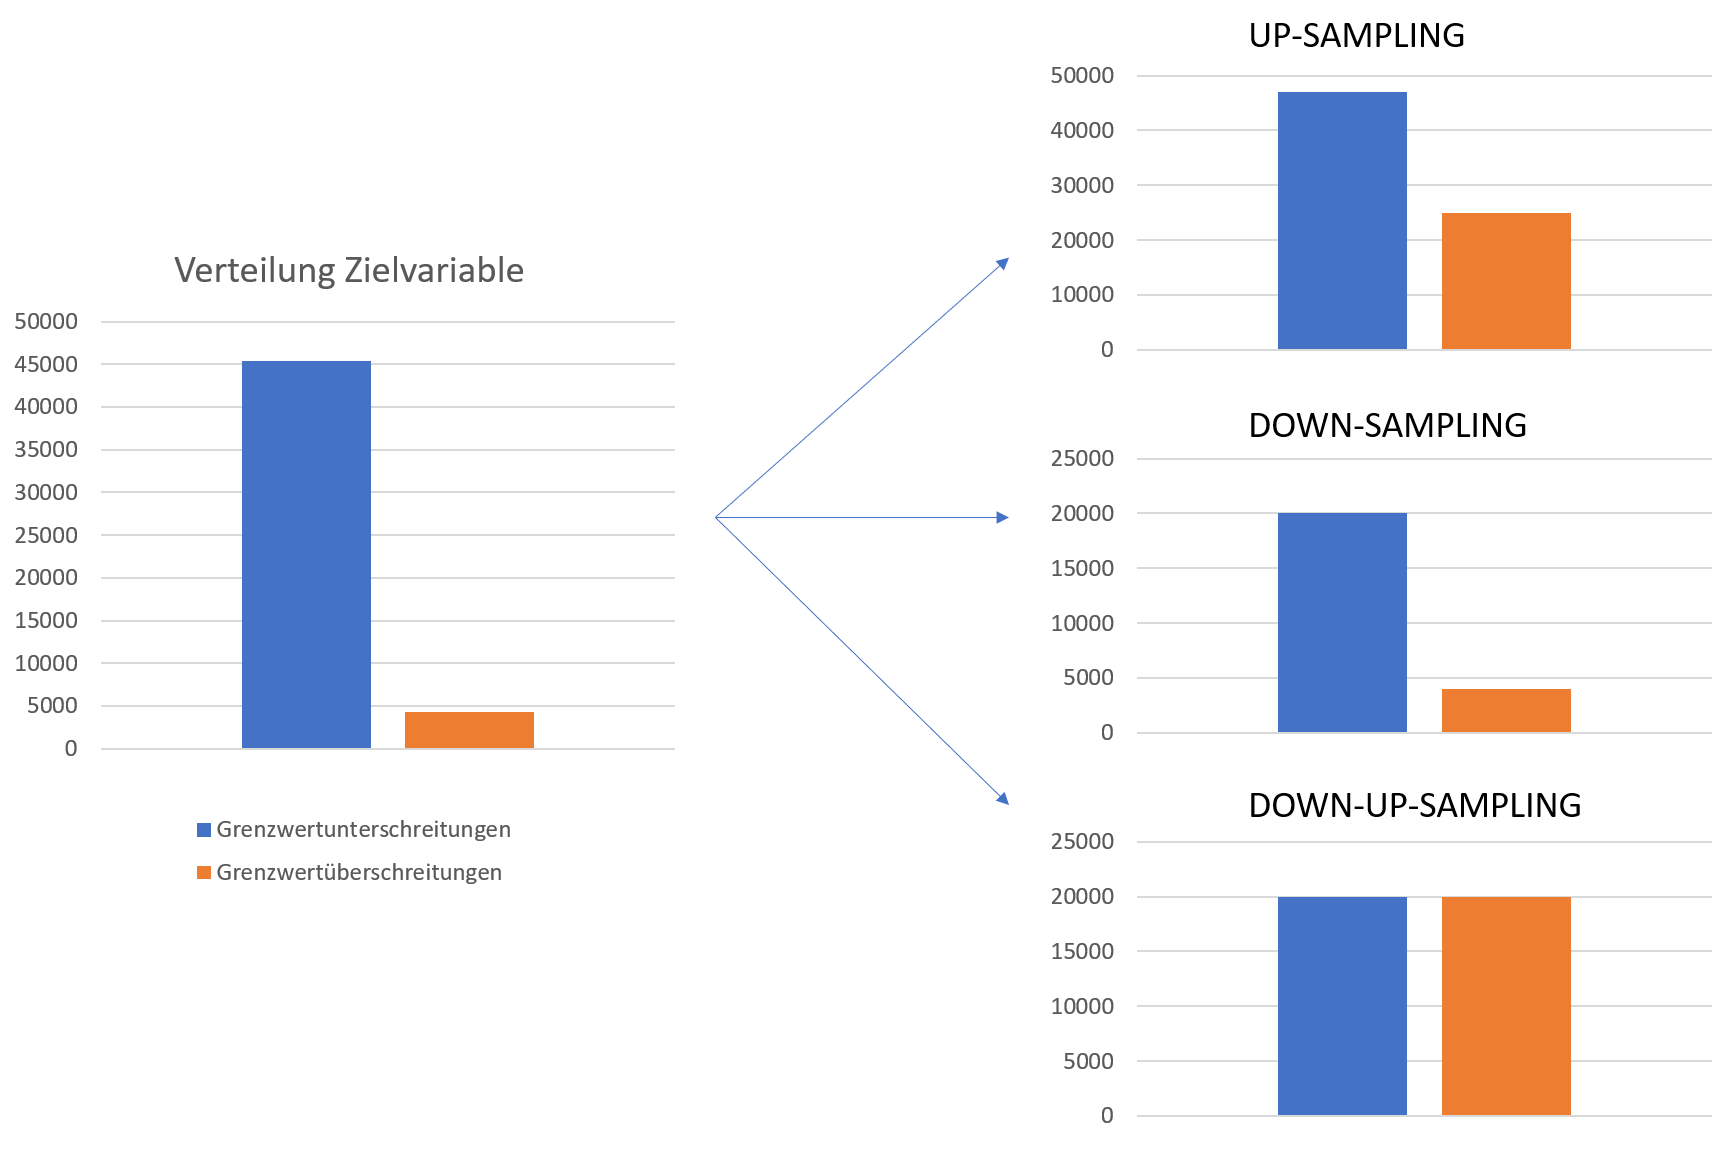

## Potenzielles Problem 2: Daten ohne Unterschied
### Der Algoritmus hat kann Grenzwertüberschreitung nicht lernen, da die Wetterparameter keine klaren Unterschied erkennen lassen

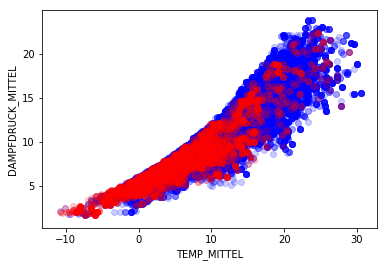

In [20]:
import matplotlib.pyplot as plt

grenzwertueberschr = data_reduziert[data_reduziert["GRENZWERTUEBERSCHREITUNG"] == 1].copy()
grenzwertunterschr = data_reduziert[data_reduziert["GRENZWERTUEBERSCHREITUNG"] == 0].copy()

plt.scatter(grenzwertunterschr["TEMP_MITTEL"], grenzwertunterschr["DAMPFDRUCK_MITTEL"], color='b', alpha=0.2)
plt.scatter(grenzwertueberschr["TEMP_MITTEL"], grenzwertueberschr["DAMPFDRUCK_MITTEL"], color='r', alpha=0.2)
plt.xlabel("TEMP_MITTEL")
plt.ylabel("DAMPFDRUCK_MITTEL")
plt.show()


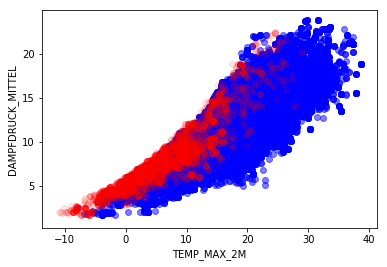

In [21]:
plt.scatter(grenzwertunterschr["TEMP_MAX_2M"], grenzwertunterschr["DAMPFDRUCK_MITTEL"], color='b', alpha=0.5)
plt.scatter(grenzwertueberschr["TEMP_MITTEL"], grenzwertueberschr["DAMPFDRUCK_MITTEL"], color='r', alpha=0.1)
plt.xlabel("TEMP_MAX_2M")
plt.ylabel("DAMPFDRUCK_MITTEL")
plt.show()


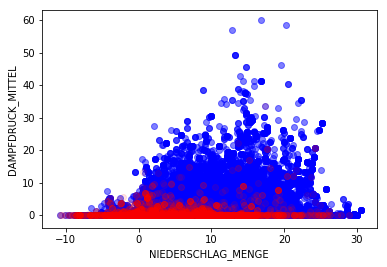

In [22]:
plt.scatter(grenzwertunterschr["TEMP_MITTEL"], grenzwertunterschr["NIEDERSCHLAG_MENGE"], color='b', alpha=0.5)
plt.scatter(grenzwertueberschr["TEMP_MITTEL"], grenzwertueberschr["NIEDERSCHLAG_MENGE"], color='r', alpha=0.1)
plt.xlabel("NIEDERSCHLAG_MENGE")
plt.ylabel("DAMPFDRUCK_MITTEL")
plt.show()

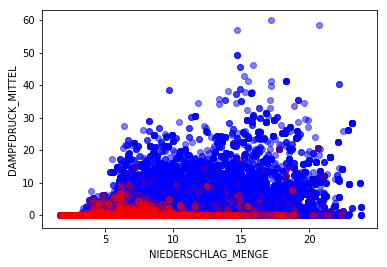

In [23]:
plt.scatter(grenzwertunterschr["DAMPFDRUCK_MITTEL"], grenzwertunterschr["NIEDERSCHLAG_MENGE"], color='b', alpha=.5)
plt.scatter(grenzwertueberschr["DAMPFDRUCK_MITTEL"], grenzwertueberschr["NIEDERSCHLAG_MENGE"], color='r', alpha=.1)
plt.xlabel("NIEDERSCHLAG_MENGE")
plt.ylabel("DAMPFDRUCK_MITTEL")
plt.show()

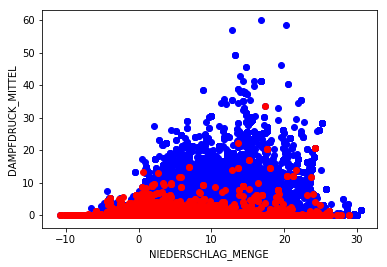

In [24]:
plt.scatter(grenzwertunterschr["TEMP_MITTEL"], grenzwertunterschr["NIEDERSCHLAG_MENGE"], color='b', alpha=1)
plt.scatter(grenzwertueberschr["TEMP_MITTEL"], grenzwertueberschr["NIEDERSCHLAG_MENGE"], color='r', alpha=1)
plt.xlabel("NIEDERSCHLAG_MENGE")
plt.ylabel("DAMPFDRUCK_MITTEL")
plt.show()

## Veränderungen im Vorgehen um die Prognose besser zu machen:
## Aufteilung der Lerndaten

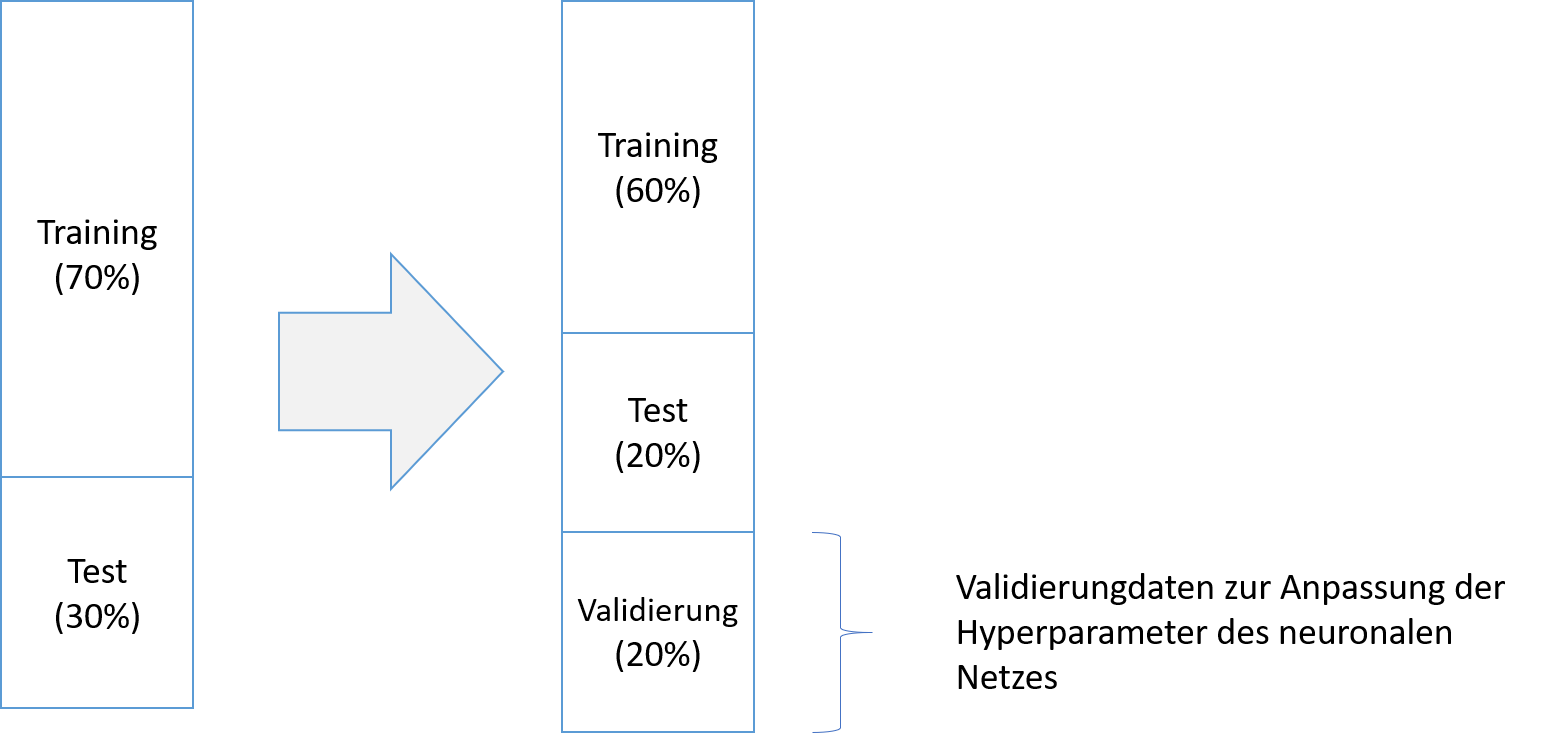

## Variante eines Neuronalen Netzes

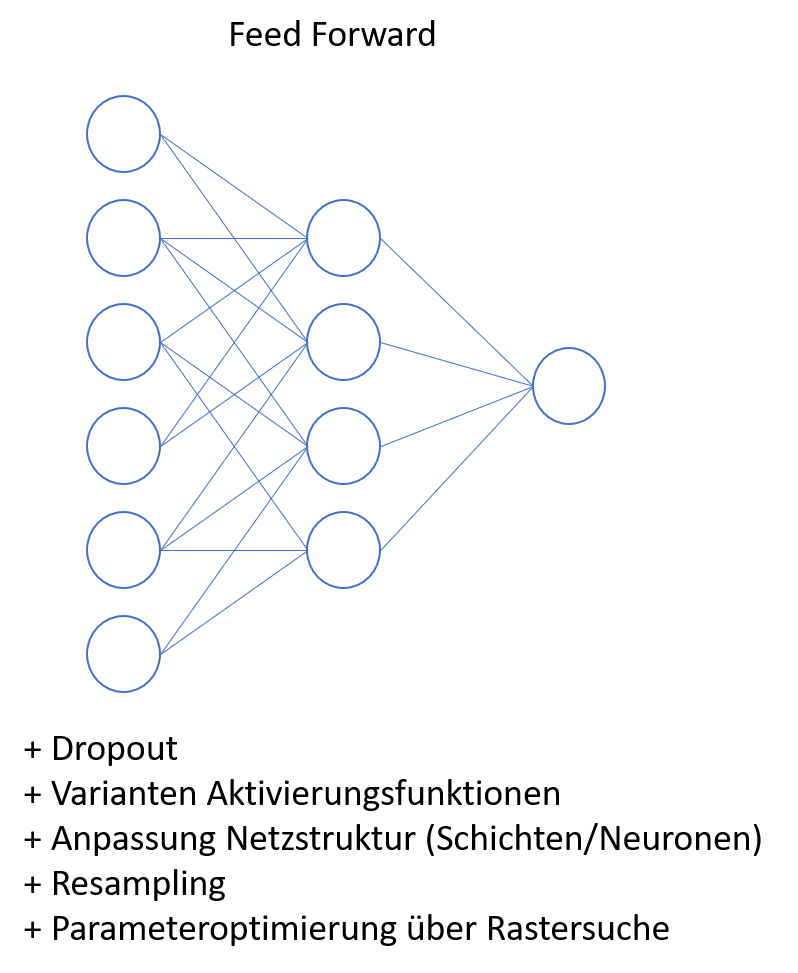

## Modellvalidierung mit Tensorboard zur Lernüberwachung

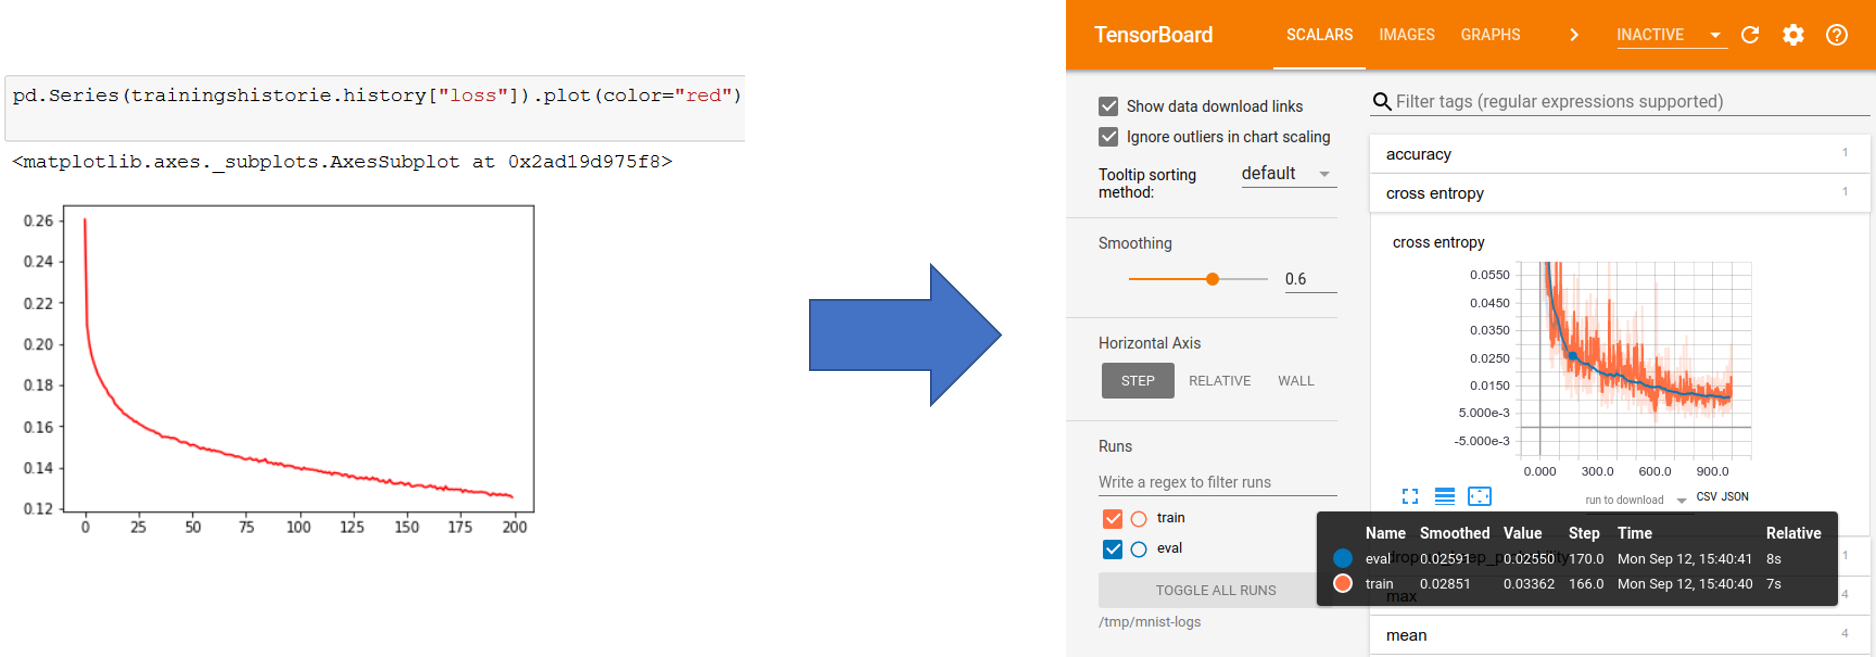